In [1]:
import numpy as np
import matplotlib.pyplot as plt

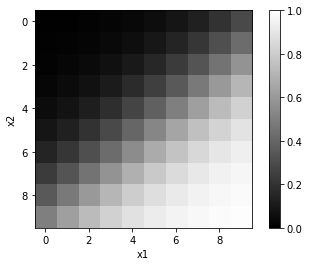

In [3]:
x1 = np.arange(-1.0, 1.0, 0.2)  # -1에서 1까지 0.2 범위로
x2 = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

w_x1 = 2.5
w_x2 = 3.0

bias = 0.1

# i 가 column, j 가 row
for i in range(10):
    for j in range(10):
        u = x1[i] * w_x1 + x2[j] * w_x2 + bias
        y = 1 / (1 + np.exp(-u))
        Z[j][i] = y
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)  # plt. image_show
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

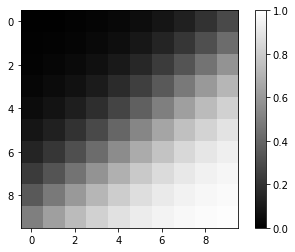

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2 값
X1 = np.arange(-1.0, 1.0, 0.2) # 원소 수는 10개
X2 = np.arange(-1.0, 1.0, 0.2)

# 출력값을 저장할 10x10 그리드
Z = np.zeros((10,10))

# x, y 값의 입력 가중치
W = np.array([2.5,3.0])

# 편향
bias = np.array([0.1])

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
    # 입력과 가중치 곱의 합 + 편향
        list1 = [X1[i], X2[j]]
        X = np.array(list1)
        u = np.dot(X, W.T) + bias
        
        # 그리드맵에 출력 값 저장
        y = 1/(1+np.exp(-u)) # 시그모이드 함수
        Z[j][i] = y
        
# 그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar()
plt.show()

### 다중 신경망

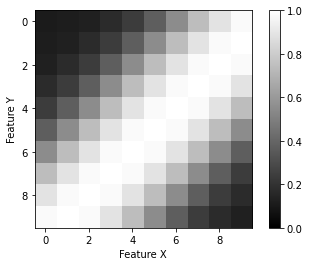

In [9]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

# 첫 번째 입력에서 히든 레이어로 넘어가는 가중치
w_im = np.array([[4.0, 4.0], [4.0, 4.0]])
# row수가 입력수랑 동일해야해서 2, 컬럼수가 미들수와 동일해야해서 2개
#그래서 2 by 2
                 
# 미들(m)에서 아웃풋(o)으로 갈 때
w_mo = np.array([[1.0], [-1.0]])
# row수가 입력수랑 미들수와 동일해야해서 2, 컬럼수가 아웃풋수와 동일해야해서 1개
# 그래서 2 by 1 행렬이 됨

# bias도 마찬가지
b_im = np.array([3.0, -3.0])
b_mo = np.array([0.1])

def middle_layer(x, w, b):  # x, weight, bias
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

# 얘를 돌려서 아까처럼 화면에 뿌려주면 됨
for i in range(10):
    for j in range(10):
        # input = np.array , X의 i번째, Y의 j번째
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)  # mid가 입력으로 들어가서, w_mo가 가중치, bias가 b_mo
        
        Z[j][i] = out[0]  # 값이 하나 나오고, numpy배열로 나옴
        
plt.imshow(Z, 'gray', vmin=0.0, vmax=1.0)
plt.colorbar()
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()

### 분류

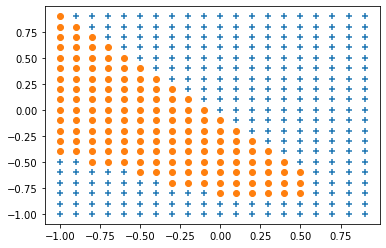

In [15]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

w_im = np.array([[1.0, 2.0], [2.0, 3.0]])
w_mo = np.array([[-1.0, 1.0], [1.0, -1.0]])

b_im = np.array([0.3, -0.3])
b_mo = np.array([0.4, 0.1])
# 아까와 다른점 -> 출력이 2개니 mo도 2개

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))
# 시그모이드

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u) / np.sum(np.exp(u))
# 소프트맥스

# 2개를 다 저장할거기 때문에, 저장할 곳을 별도로 만들 것
x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        # 여기서 각각에 따로따로 저장합시다
        # 만약 출력 0번째가, 출력 1번째보다 크면
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(X[j])
            # 여기에 append 시킴
        else:
            x_2.append(X[i])
            y_2.append(X[j])
            
# 얘를 scatter로 나타내보자.
plt.scatter(x_1, y_1, marker='+')  # 첫뻔재 큰놈은 +
plt.scatter(x_2, y_2, marker='o')  # 두번째 큰놈은 o
plt.show()

# 2번째 feature가 -0.5->2번째 큰놈



● w_im = np.array([[2.0,1.0], [0.0,3.0]])\
w_mo = np.array([[­2.0,1.0], [-1.0,­1.0]])
# 편향
b_im = np.array([-0.3,­0.3]) \
b_mo = np.array([0.4,­1.2])


● w_im = np.array([[2.0,2.0], [2.0,3.0]])\
w_mo = np.array([[­1.0,1.0], [1.0,­1.0]])
# 편향
b_im = np.array([0.3,­0.3])\
b_mo = np.array([0.4,0.1])